In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np
import os
import re
root_path = 'log/'

legend_font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 12,
    }
font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 15,
    }

colorlist = ['darkorange', 'cyan', 'lightsteelblue', 'plum', 'darkseagreen', 'gold', 'bisque', 'lightgreen', 'gray']
color_rgb_list = [(74/255, 135/255, 161/255), (222/255, 144/255, 123/255), (230/255, 197/255, 180/255), (88/255, 141/255, 106/255), (147/255, 196/255, 212/255), (237/255, 204/255, 134/255), (156/255, 131/255, 131/255), (116/255, 126/255, 73/255), (61/255, 71/255, 59/255), (36/255, 74/255, 96/255)]

def extract_number(feature, data, split_str):
    result_list = []
    for line in data:
        #print(line)
        seg = re.split(split_str, line)
        if set(feature).issubset(set(seg)):
            for item in seg:
                if item.lstrip('-').replace('.', '').replace(',', '').isdigit():
                    item = item.replace(',', '')
                    try:
                        result_list.append(int(item))  
                    except ValueError:
                        result_list.append(float(item))  
                        
    return result_list
                
def process_log(root_path, log_path, steps_feature = ['components'], \
                steps_split = ' |\n', val_split = ' |\n|\)|\(|%', val_features = ['set:', 'Accuracy:', 'Test']):
    with open(root_path + log_path, 'r') as f:
        data = f.readlines()
        steps_list = extract_number(feature = steps_feature, data = data, split_str = steps_split)
        val_list = extract_number(feature = val_features, data = data, split_str = val_split) 
    
    
    if abs(len(steps_list) -  len(val_list)) == 1:
        min_len = min(len(steps_list), len(val_list))
        return steps_list[:min_len], val_list[:min_len]
    else:
        return steps_list, val_list

def process_smooth(steps_list, val_list, smooth_len):
    steps = [0] * len(range(0, len(steps_list)-smooth_len+1, smooth_len))
    vals = [0] * len(steps)
    for i in range(0, len(steps_list)-smooth_len+1, smooth_len):
        steps[i // smooth_len]  = steps_list[i+np.argmin(val_list[i:i+smooth_len])]
        vals[i // smooth_len] = np.min(val_list[i:i+smooth_len])
    return steps, vals

In [2]:
def smooth(r_list,plot_list_len,smooth_len):
    plot_list = []
    for i in range(plot_list_len):
        plot_list.append(np.mean(r_list[i*smooth_len:(i+1)*smooth_len]))
    return plot_list

/home/go3/.conda/envs/ass/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/go3/.conda/envs/ass/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


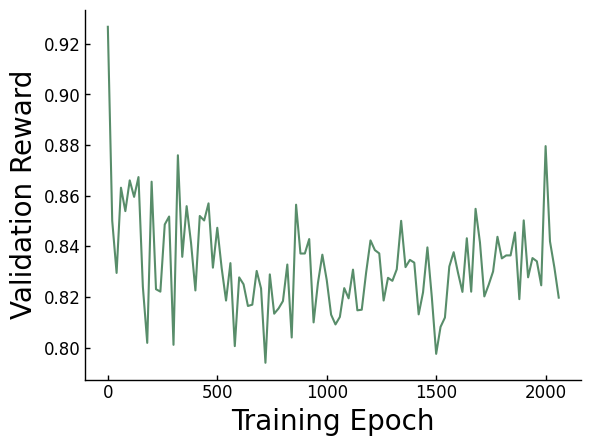

In [407]:
with open(r'log/' + 'A2C2022-12-22-21-13-51', 'r') as f:
    data = f.readlines()
    result_list = []
    for line in data:
        if 'validate reward:' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg))
now=3000
smooth_len = 20
x = np.arange(0,now,1*smooth_len)
y = smooth(result_list[:len(x)*smooth_len],len(x),smooth_len)
steps = np.arange(0,now,1*smooth_len)
plt.figure()
ax = plt.gca().axes

plt.plot(steps,y/min_,color=color_rgb_list[3])
#plt.plot(x,[86.5]*len(x))
#y_major_locator=MultipleLocator(2)
#ax.yaxis.set_major_locator(y_major_locator)

plt.xlabel("Training Epoch",size=20)
plt.ylabel('Validation Reward',size=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(1);####设置左边坐标轴的粗细
ax.tick_params(direction='in', width=1)
#ax.tick_params(fontsize=18)

#plt.ylim(36,47)
plt.xticks(size=12)
plt.yticks(size=12)
#plt.savefig(r'plot/'+'1008A2C2022-12-18-23-31-04'+'steps_'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')
plt.show()

In [62]:
np.array([[1,2],[3,3]]).mean(0)

array([2. , 2.5])

In [89]:
3.8726*(0.999**30000)

3.5698454998557403e-13

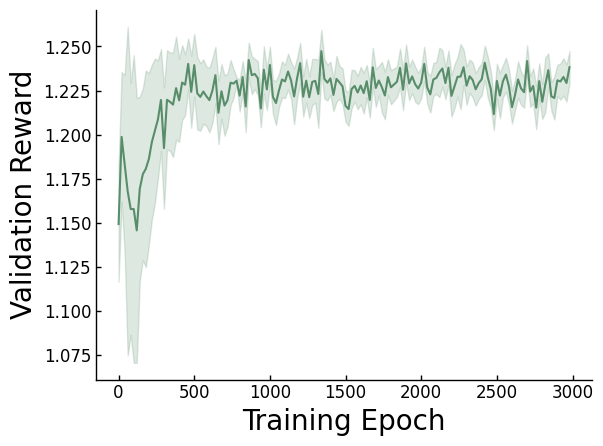

In [376]:
log_list = ['A2C2022-12-17-14-14-31','A2C2022-12-17-16-09-53','A2C2022-12-17-16-10-08','A2C2022-12-17-16-10-19','A2C2022-12-17-16-10-31']#
now=3000
smooth_len = 20
for ind,log in enumerate(log_list):
    with open(r'log/' + log, 'r') as f:
        data = f.readlines()
        result_list = []
        for line in data:
            if 'validate reward:' in line:
                seg = re.split(' |\n', line)[-2]
                result_list.append(float(seg))
    steps = np.arange(0,now,1*smooth_len)
    y = smooth(result_list[:len(steps)*smooth_len],len(steps),smooth_len)/min_
    if ind==0:
        vals = np.array(y)
    else:
        vals = np.vstack((vals, y))

plt.figure()
ax = plt.gca().axes
plt.plot(steps, vals.mean(axis = 0), color=color_rgb_list[3])
r1 = list(map(lambda x: x[0]-x[1], zip(vals.mean(axis = 0), vals.std(axis = 0))))
r2 = list(map(lambda x: x[0]+x[1], zip(vals.mean(axis = 0), vals.std(axis = 0))))
ax.fill_between(steps, r1, r2, color=color_rgb_list[3], alpha=0.2)


'''
plt.plot(x,y,color=color_rgb_list[3])
#plt.plot(x,[86.5]*len(x))
'''

plt.xlabel("Training Epoch",size=20)
plt.ylabel('Validation Reward',size=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(1);####设置左边坐标轴的粗细
ax.tick_params(direction='in', width=1)
#ax.tick_params(fontsize=18)
plt.xticks(size=12)
plt.yticks(size=12)
plt.savefig(r'plot/'+'variance1.0'+'steps_'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')
plt.show()

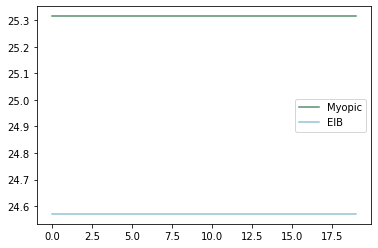

In [431]:
#看benchmark的平均表现
with open(r'log/' + 'A2C2022-11-29-10-17-54', 'r') as f:
    data = f.readlines()
    OA_list = []
    Myopic_list = []
    EIB_list = []
    for line in data:
        if 'mean test reward:' in line:
            OA_list.append(float(line.split(',')[-3]))
            Myopic_list.append(float(line.split(',')[-2]))
            EIB_list.append(float(line.split(',')[-1]))

smooth_len = 3
#x = np.arange(0,int(2000 / 100)*20,5*smooth_len)
#y = smooth(result_list[:len(x1)*smooth_len],len(x1),smooth_len)
#plt.plot(x,y)
len_ = len(OA_list)
x = np.arange(len_)
#plt.plot(x,[np.mean(OA_list)]*len_,color=color_rgb_list[1])
plt.plot(x,[np.mean(Myopic_list)]*len_,color=color_rgb_list[3],label='Myopic')
plt.plot(x,[np.mean(EIB_list)]*len_,color=color_rgb_list[4],label='EIB')
plt.legend()

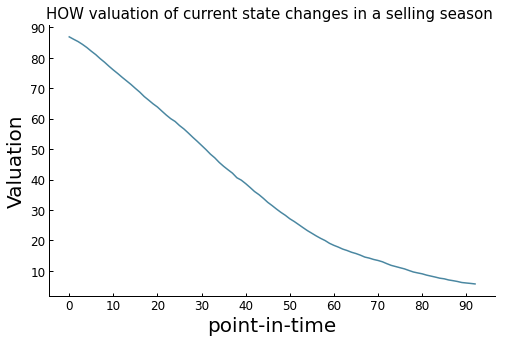

In [202]:
#看value function的变化趋势 A2C2022-11-21-10-42-59

value_list = [86.89658343615095, 86.10397570216101, 85.35042921908592, 84.42253288650723, 83.38088149935189, 82.18086391968377, 81.06664218799821, 79.75143644723626, 78.56741630220915, 77.24911000164518, 76.00625297582678, 74.83925337063864, 73.59777638508277, 72.42419681077308, 71.2472093888563, 69.9519923965245, 68.71569549733803, 67.27920971521756, 66.10096303740724, 64.89195223869105, 63.83174880687191, 62.49764345714972, 61.19268464778215, 60.01111249856044, 59.085931170611865, 57.74544479993433, 56.617081943749, 55.287287173142275, 53.90028447484984, 52.58747294651259, 51.213867438987315, 49.83693120518892, 48.354398549432894, 47.12338907692597, 45.624344303294535, 44.34808207419302, 43.20403018366949, 42.10497160339768, 40.59360845707205, 39.80082382527054, 38.65586242274874, 37.39347424303277, 36.068577913247225, 35.044377017492266, 33.83160589935764, 32.511207264707615, 31.430489683093366, 30.278969440800914, 29.19856357669314, 28.232373386383152, 27.106087305379265, 26.210228729182425, 25.20675368573442, 24.191609561031004, 23.203118551268574, 22.33955139657794, 21.462421819833377, 20.658269435697942, 19.947433113010355, 19.037186022665022, 18.365190423253114, 17.7956069153228, 17.13769356100294, 16.665902977934007, 16.09844292032932, 15.674712144422397, 15.14472528601251, 14.519440071151973, 14.183715754341739, 13.730809027576802, 13.396828887746306, 12.96701006462413, 12.347297736895786, 11.78448122442158, 11.401936791347955, 11.011284841727313, 10.633278079469978, 10.114497968206587, 9.62013156298735, 9.304098483047552, 9.015466506961504, 8.588261660073579, 8.262198390151703, 7.93486485268353, 7.575186334170567, 7.373132511763217, 6.996776004655004, 6.760012703306707, 6.493906107053782, 6.152423992844887, 5.999173641054043, 5.852814219516828, 5.68304830200321]

x = np.arange(len(value_list))
plt.figure(figsize=(8,5))
ax = plt.gca().axes

plt.plot(x,value_list,color=color_rgb_list[0])

plt.xlabel("point-in-time",size=20)
plt.ylabel('Valuation',size=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(1);####设置左边坐标轴的粗细
ax.tick_params(direction='in', width=1)
#ax.tick_params(fontsize=18)
plt.xticks(size=12)
plt.yticks(size=12)
x_major_locator=MultipleLocator(10)
ax.xaxis.set_major_locator(x_major_locator)
plt.title('HOW valuation of current state changes in a selling season ',size=15)

plt.savefig(r'plot/'+'A2C2022-11-21-10-42-59'+'Value'+'.pdf', dpi=600, format='pdf')

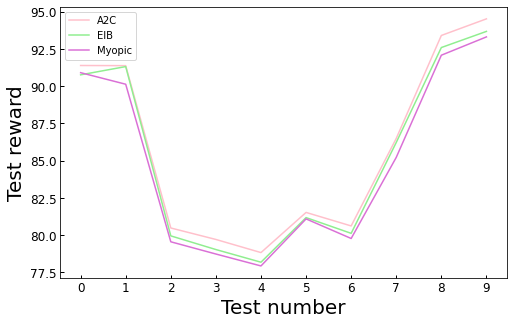

In [223]:
#多次test，每一次A2C都表现得最好
with open(r'log/' + 'A2C2022-11-21-11-09-43', 'r') as f:
    data = f.readlines()
    A2C_list = []
    Myopic_list = []
    EIB_list = []
    for line in data:
        if 'mean test reward:' in line:
            A2C_list.append(float(line.split(',')[-4][-7:]))
            Myopic_list.append(float(line.split(',')[-2]))
            EIB_list.append(float(line.split(',')[-1]))


len_ = len(A2C_list)
x = np.arange(len_)

plt.figure(figsize=(8,5))
ax = plt.gca().axes
plt.plot(x,A2C_list,color='pink',label='A2C')
plt.plot(x,EIB_list,color='lightgreen',label='EIB')
plt.plot(x,Myopic_list,color='orchid',label='Myopic')
plt.legend()
plt.xlabel("Test number",size=20)
plt.ylabel('Test reward',size=20)
plt.xticks(size=12)
plt.yticks(size=12)
ax.tick_params(direction='in', width=1)
x_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)
plt.savefig(r'plot/'+'A2C2022-11-21-11-09-43'+'Test10'+'.pdf', dpi=600, format='pdf')

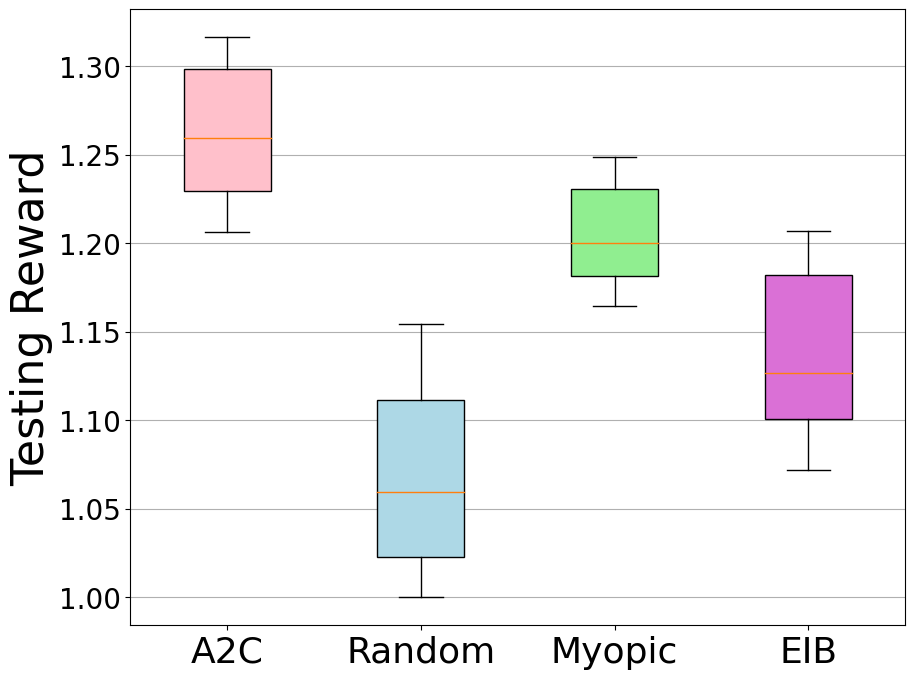

In [406]:
#看benchmark的平均表现
with open(r'log/' + 'A2C2022-12-17-16-09-53', 'r') as f:
    data = f.readlines()
    OA_list = []
    Myopic_list = []
    EIB_list = []
    for line in data:
        if 'mean test reward:' in line:
            OA_list.append(float(line.split(',')[-3]))
            Myopic_list.append(float(line.split(',')[-2]))
            EIB_list.append(float(line.split(',')[-1]))

with open(r'log/' + 'A2C2022-12-17-16-09-53', 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-4][-7:]))

min_ = np.min(OA_list)            
data = [np.array(seller_list)/min_, np.array(OA_list)/min_,
                np.array(Myopic_list)/min_, np.array(EIB_list)/min_]

labels = ['A2C', 'Random', 'Myopic', 'EIB']
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
# ax1.set_title('Rectangular box plot')
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'orchid']
#colors = ['#edae49', '#d1495b', '#00798c', '#003d5b']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
# adding horizontal grid lines
ax1.yaxis.grid(True)
#plt.xlabel("Epoch",size=20)
plt.ylabel('Testing Reward',size=32)
plt.tick_params(axis='x',labelsize=26)
plt.tick_params(axis='y',labelsize=20)
#fig.savefig(r'plot/'+'1008A2C2022-12-18-23-31-04'+'.pdf',dpi=600, format='pdf')            
plt.show()


In [401]:
with open(r'log/' + 'A2C2022-12-17-15-53-00', 'r') as f:
    data = f.readlines()
    OA_list = []
    Myopic_list = []
    EIB_list = []
    for line in data:
        if 'mean test reward:' in line:
            OA_list.append(float(line.split(',')[-3]))
            Myopic_list.append(float(line.split(',')[-2]))
            EIB_list.append(float(line.split(',')[-1]))
print(np.mean(OA_list),np.mean(Myopic_list),np.mean(EIB_list)) #10000 

with open(r'log/' + 'A2C2022-12-19-16-37-50', 'r') as f:
    data = f.readlines()
    OA_list = []
    Myopic_list = []
    EIB_list = []
    for line in data:
        if 'mean test reward:' in line:
            OA_list.append(float(line.split(',')[-3]))
            Myopic_list.append(float(line.split(',')[-2]))
            EIB_list.append(float(line.split(',')[-1]))
print(np.mean(OA_list),np.mean(Myopic_list),np.mean(EIB_list)) #100

with open(r'log/' + 'A2C2022-12-19-13-33-46', 'r') as f:
    data = f.readlines()
    OA_list = []
    Myopic_list = []
    EIB_list = []
    for line in data:
        if 'mean test reward:' in line:
            OA_list.append(float(line.split(',')[-3]))
            Myopic_list.append(float(line.split(',')[-2]))
            EIB_list.append(float(line.split(',')[-1]))
print(np.mean(OA_list),np.mean(Myopic_list),np.mean(EIB_list))  #1000

with open(r'log/' + 'A2C2022-12-19-13-35-09', 'r') as f:
    data = f.readlines()
    OA_list = []
    Myopic_list = []
    EIB_list = []
    for line in data:
        if 'mean test reward:' in line:
            OA_list.append(float(line.split(',')[-3]))
            Myopic_list.append(float(line.split(',')[-2]))
            EIB_list.append(float(line.split(',')[-1]))
print(np.mean(OA_list),np.mean(Myopic_list),np.mean(EIB_list)) #5000

with open(r'log/' + 'A2C2022-12-19-13-35-36', 'r') as f:
    data = f.readlines()
    OA_list = []
    Myopic_list = []
    EIB_list = []
    for line in data:
        if 'mean test reward:' in line:
            OA_list.append(float(line.split(',')[-3]))
            Myopic_list.append(float(line.split(',')[-2]))
            EIB_list.append(float(line.split(',')[-1]))
print(np.mean(OA_list),np.mean(Myopic_list),np.mean(EIB_list)) #20000

36.06373 40.963495 38.417195
36.29584 39.77519 37.706125
36.43904 40.98883 38.392700000000005
36.306145 39.120374999999996 38.081885
36.472055 40.61078 39.109415


In [400]:
with open(r'log/' + 'A2C2022-12-17-16-09-53', 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-4][-7:]))
            
np.mean(seller_list)

42.89026

In [404]:
5.312/50


0.10624